# このプログラムの使い方
下の手順に従って、Excelファイルのアップロードをしましょう。(ファイルをアップロードしても、データ等がネット上に公開されたりすることはありません。)
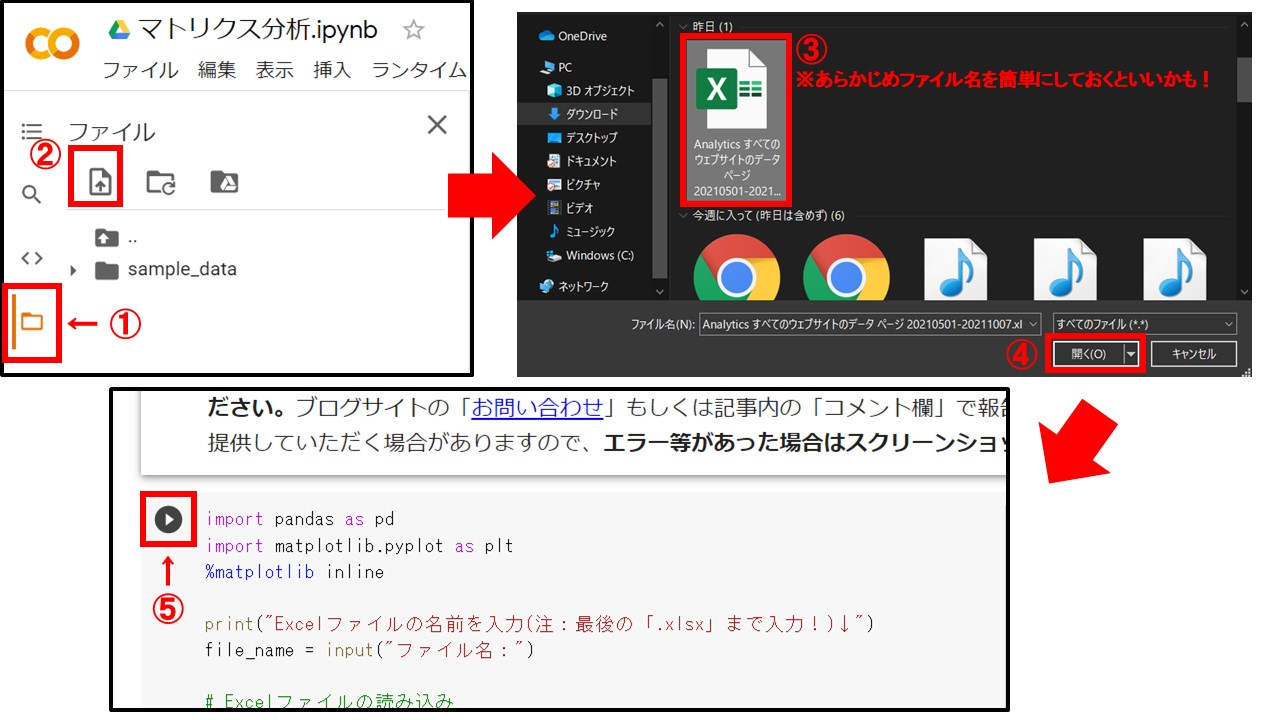
図のように「▶」マークをクリックし、「■」マークになってクルクル回り始めたら成功です。すると下の方に入力欄が出てくるので、指示に従って入力していくと分析結果がでてきます。
<br>
## 【補足】「ファイルに保存する」を選択した人は...
指示に従って入力していると「ファイルに保存しますか？」という質問があると思います。このファイルは、左側にある「ファイル」というところに保管されています(*左の「ファイル」欄に保存された画像・テキストが反映されるまでには少し時間(40秒ほど？)がかかります)。この状態ではあなたのPCには保存されていないので、ウィンドウを閉じてしまうと消えてしまいます。「それでは困る！」という人は、きちんとダウンロードしておきましょう。「ファイル名にカーソルを当てて右クリック」→「"ダウンロード”をクリック」で保存できます。<br>


# 困ったときは…
エラーが出た場合は、入力やファイルに問題がある可能性があります。以下の事項を確認してください。
- Excelファイルを正しくアップロードしましたか？左の「ファイル」でExcelファイルがアップロードされているか確認しましょう。
- ファイル名を正しく入力しましたか？全角・半角・スペースの有無など含めて完全に一致していなければなりません。
- ファイル名の最後に「.xlsx」は入力しましたか？これがないとエラーになります。
- 数字やアルファベットを<strong>全角で入力していませんか？</strong>半角で入力しないとエラーになる場合があります。
<br><br>
「それでもエラーが出る」<br>
「やり方がわからずつまづいている」<br>
「分析結果は出たけど、明らかにおかしい結果になっている」<br>
などがあるときは、僕の<strong>Twitter(<a href="https://twitter.com/StudyLife2021">@StudyLife2021</a>）のDMからご連絡ください。</strong>ブログサイトの「<a href="https://matsuda-blog.info/contact/">お問い合わせ</a>」もしくは記事内の「コメント欄」で報告していただいても結構です。その際スクショなどを提供していただく場合がありますので、<strong>エラー等があった場合はスクリーンショットを保存しておいてください。</strong><br>※分析結果の見方などについてはブログ記事のほうを見てください。<br>
最終更新：2021年10月9日16時20分


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

print("Excelファイルの名前を入力(注：最後の「.xlsx」まで入力！)↓")
file_name = input("ファイル名：")

# Excelファイルの読み込み
df = pd.read_excel(file_name, sheet_name=1).iloc[:-1,[0,1,3,5]]

# クエリ文字を削除
page = []
for i in df["ページ"]:
  if "?" in i:
    idx = i.find("?")
    page.append(i[:idx])
  else:
    page.append(i)
df["ページ"] = page

# 平均ページ滞在時間・直帰率を統合
df["sum_staytime"] = df["ページビュー数"] * df["平均ページ滞在時間"]
df["sum_bounce"] = df["ページビュー数"] * df["直帰率"]
df = df.groupby("ページ").sum()
df["平均ページ滞在時間"] = df["sum_staytime"] / df["ページビュー数"]
df["直帰率"] = df["sum_bounce"] / df["ページビュー数"]
scaler = StandardScaler()
df["std_staytime"] = scaler.fit_transform(df[["平均ページ滞在時間"]])
df["std_bounce"] = scaler.fit_transform(df[["直帰率"]])

# デフォルト散布図の出力
X,Y,Xs,Ys = 0,0,0,0

def scatter(p):
  global X,Y,Xs,Ys
  Y = df["平均ページ滞在時間"].quantile(p)
  X = df["直帰率"].quantile(p)
  Ys = df["std_staytime"].quantile(p)
  Xs = df["std_bounce"].quantile(p)
  plt.scatter(df["直帰率"], df["平均ページ滞在時間"], marker=".")
  plt.axhline(y=Y, c="gray")
  plt.axvline(x=X, c="gray")
  plt.ylabel("mean stay time")
  plt.xlabel("bounce rate")

fig = plt.figure()
scatter(0.5)
plt.show()

# デフォルト集計値の出力
text = []

def results(std):
  global X,Y,Xs,Ys,text
  df1 = df[df["平均ページ滞在時間"] >= Y][df[df["平均ページ滞在時間"] >= Y]["直帰率"] >= X]
  df2 = df[df["平均ページ滞在時間"] >= Y][df[df["平均ページ滞在時間"] >= Y]["直帰率"] <= X]
  df3 = df[df["平均ページ滞在時間"] <= Y][df[df["平均ページ滞在時間"] <= Y]["直帰率"] <= X]
  df4 = df[df["平均ページ滞在時間"] <= Y][df[df["平均ページ滞在時間"] <= Y]["直帰率"] >= X]
  ev1 = ((df1["std_staytime"]-Ys)**2 + (df1["std_bounce"]-Xs)**2)**1/2
  ev2 = ((df2["std_staytime"]-Ys)**2 + (df2["std_bounce"]-Xs)**2)**1/2
  ev3 = ((df3["std_staytime"]-Ys)**2 + (df3["std_bounce"]-Xs)**2)**1/2
  ev4 = ((df4["std_staytime"]-Ys)**2 + (df4["std_bounce"]-Xs)**2)**1/2
  RESULT = "/"*20 + "集計結果" + "/"*20
  R1 = "-"*5 + "悩み解決グループ({})".format(len(df1)) + "-"*5
  R2 = "-"*5 + "大満足グループ({})".format(len(df2)) + "-"*5
  R3 = "-"*5 + "内部リンク活躍グループ({})".format(len(df3)) + "-"*5
  R4 = "-"*5 + "期待外れグループ({})".format(len(df4)) + "-"*5
  print("")
  print(RESULT)
  text.append(RESULT)
  print(R1)
  text.append(R1)
  for i,j in zip(df1.index, ev1):
    text.append(str(round(j,2)).ljust(8) + i)
    print(str(round(j,2)).ljust(8) + i)
  print(R2)
  text.append(R2)
  for i,j in zip(df2.index, ev2):
    text.append(str(round(j,2)).ljust(8) + i)
    print(str(round(j,2)).ljust(8) + i)
  print(R3)
  text.append(R3)
  for i,j in zip(df3.index, ev3):
    text.append(str(round(j,2)).ljust(8) + i)
    print(str(round(j,2)).ljust(8) + i)
  print(R4)
  text.append(R4)
  for i,j in zip(df4.index, ev4):
    text.append(str(round(j,2)).ljust(8) + i)
    print(str(round(j,2)).ljust(8) + i)
  print("/"*40)
  text.append("/"*40)
  text.append("分類基準 : " + std)
  
results("中央値")


# ファイルに保存
def save_file(g_name, t_name):
  print("")
  print("結果をファイルに保存しますか？")
  print("0 : 保存しない")
  print("1 : グラフのみ保存(.jpeg)")
  print("2 : 集計結果のみ保存(.txt)")
  print("3 : グラフと集計結果の両方を保存")
  print("以上0～3の中から1つ選んで、番号を入力してください↓")
  save_opt = input("番号 : ")

  if save_opt == "1" or save_opt == "3":
    fig.savefig(g_name)
  if save_opt == "2" or save_opt == "3":
    t = "\n".join(text)
    with open(t_name, 'w') as f:
      f.write(t)

save_file("graph_default.jpeg","results_default.txt")


# オプション
print("")
print("基準軸の位置(デフォルトの基準：中央値)を変更しますか？")
opt = input("はい→y, いいえ→n を入力：")


if opt == "y":
  print("")
  print("1 : 平均値")
  print("2 : 第1四分位数(25％点)")
  print("3 : 第3四分位数(75％点)")
  print("4 : あなたの好きな位置にカスタマイズ")
  print("以上1～4の中から1つ選んで、番号を入力してください↓")
  axis_opt = input("番号：")

  if axis_opt == "1":
    Y = df["平均ページ滞在時間"].mean()
    X = df["直帰率"].mean()
    Ys = df["std_staytime"].mean()
    Xs = df["std_bounce"].mean()
    fig = plt.figure()
    plt.scatter(df["直帰率"], df["平均ページ滞在時間"], marker=".")
    plt.axhline(y=Y, c="gray")
    plt.axvline(x=X, c="gray")
    plt.ylabel("mean stay time")
    plt.xlabel("bounce rate")
  elif axis_opt == "2":
    fig = plt.figure()
    scatter(0.25)
  elif axis_opt == "3":
    fig = plt.figure()
    scatter(0.75)
  elif axis_opt == "4":
    print("")
    print("縦軸の位置Xと縦軸の位置Yをそれぞれ入力してください↓")
    X = float(input("X(直帰率の値) = "))
    Y = float(input("Y(平均ページ滞在時間の値) = "))
    Ys = (Y - df["平均ページ滞在時間"].mean())/df["平均ページ滞在時間"].std()
    Xs = (X - df["直帰率"].mean())/df["直帰率"].std()
    fig = plt.figure()
    plt.scatter(df["直帰率"], df["平均ページ滞在時間"], marker=".")
    plt.axhline(y=Y, c="gray")
    plt.axvline(x=X, c="gray")
    plt.ylabel("mean stay time")
    plt.xlabel("bounce rate")    
  plt.show()

  ## 集計結果(カスタマイズ版)の出力
  text.clear()
  if axis_opt == "1":
    results("平均値")
  elif axis_opt == "2":
    results("第1四分位数(25％点)")
  elif axis_opt == "3":
    results("第3四分位数(75％点)")
  elif axis_opt == "4":
    results("\n平均ページ滞在時間 = " + str(X) + "\n直帰率 = " + str(Y))
  

  ## ファイルに保存
  save_file("graph_custom.jpeg","results_custom.txt")

失敗したり、やり直したいときは、再び「▶」マークを押せば (「Ctrl」+「Enter」でもOK）何回でも試すことができます！